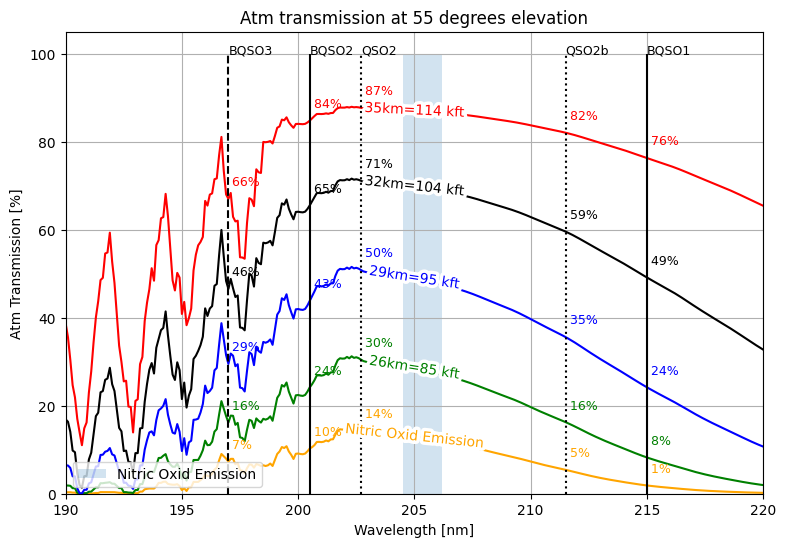

In [6]:
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
from labellines import labelLines
import glob
from astropy.io import fits
import warnings
warnings.filterwarnings("ignore")

# labelLines(plt.gca().get_lines(),align=True,xvals=[205,205,205,205,205],fontsize=10)

cat = Table.read("/Users/Vincent/Github/FIREBallIMO/FireBallIMO/Atmosphere/AtmTrans_wave_180-239-0.1000nm_Alt_25-45.csv")
plt.figure(figsize=(9,6))
plt.fill_between([204.5,206.2],[0,0],[100,100], label="Nitric Oxid Emission",alpha=0.2) 
plt.legend(loc="lower left")     

for col,c in zip(cat.colnames[2:-5][::3],["orange","green","blue","black","red"]):
    plt.plot(cat["Wavelength"],np.convolve(100*cat[col],np.ones(10)/10,mode="same"),label=col[6:] + "=%i kft"%(float(col[-4:-2])/0.3048),c=c)
labelLines(plt.gca().get_lines(),align=True,xvals=[205,205,205,205,205],fontsize=10)

for label, line, ls in zip(["BQSO2","BQSO1","BQSO3","QSO2","QSO2b"],[200.5,215,197,202.7,211.5],["-","-","--",":",":"]):
    plt.vlines(line,0,100,ls=ls,color="k")
    plt.text(line,100,label,fontsize=9)
    for col,c in zip(cat.colnames[2:-5][::3],["orange","green","blue","black","red"]):
        
        plt.text(line,3+np.convolve(100*cat[col],np.ones(10)/10,mode="same")[np.argmin(abs(cat["Wavelength"]-line))]," %i%%"%(np.convolve(100*cat[col],np.ones(10)/10,mode="same")[np.argmin(abs(cat["Wavelength"]-line))]),fontsize=9,c=c)
        
    # plt.text()
# plt.vlines(201,0,100,ls=":",color="k",label="BQSO2")
# plt.vlines(215,0,100,ls="-",color="k",label="BQSO1")
# plt.vlines(197,0,100,ls="--",color="k",label="BQSO3")
# plt.vlines(202,0,100,ls=":",color="gray",label="QSO2")
# plt.legend()
plt.xlim((190,220))
plt.ylim(ymin=0)
plt.grid()
plt.xlabel("Wavelength [nm]")
plt.ylabel("Atm Transmission [%]")
plt.title("Atm transmission at 55 degrees elevation")
plt.show()

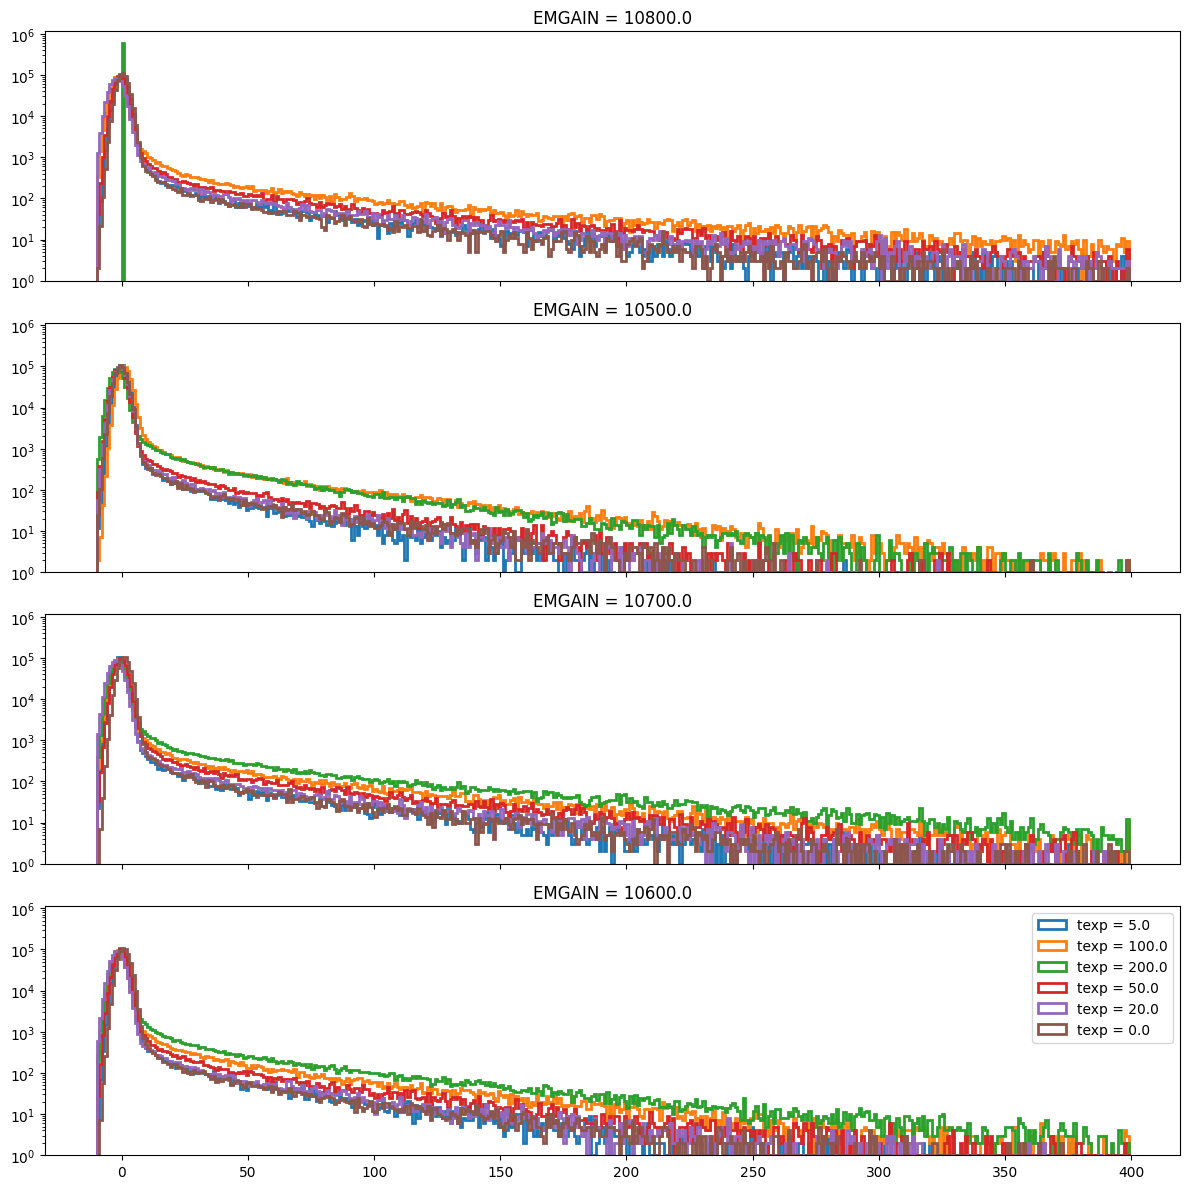

In [7]:
n=0
fig, axes = plt.subplots(4,1,figsize=(12,12),sharex=True, sharey=True)
# for folder, ax  in zip(glob.glob("/Users/Vincent/DS9QuickLookPlugIn/subsets/S2_hdr/EMGAIN_*0"),axes):
for folder, ax  in zip(glob.glob("/Users/Vincent/DS9QuickLookPlugIn/subsets/S2/EMGAIN_*0"),axes):
    ax.set_title("EMGAIN = %s"%(folder.split("EMGAIN_")[-1]))
    for fold in glob.glob(folder + "/EXPTIME_*"):
        file=glob.glob(fold+"/image*.fits")[0]
        im= fits.open(file)[0].data        
        im=im - np.median(im) #+8000
        #S2_hdr
        # a,b,c = ax.hist(im[20:1000,2300:].flatten(), bins=2500,range=(-500,2000),log=True,histtype="step",label="texp = %s"%(fold.split("EXPTIME_")[-1]),lw=2,ls="-")
        # a,b,c = ax.hist(im[20:1000,200:800].flatten(), bins=800,range=(-500,2000),log=True,histtype="step",label="texp = %s"%(fold.split("EXPTIME_")[-1]),lw=2,ls="-")
        # a,b,c = ax.hist(im[1020-n:2000-n:,1200:1800].flatten(), bins=800,range=(-500,10000),log=True,histtype="step",label="texp = %s"%(fold.split("EXPTIME_")[-1]),lw=2,ls="-")
        #S2
        
        # a,b,c = ax.hist(im[20:1000,2300:].flatten(), bins=np.arange(-10,150),log=True,histtype="step",label="texp = %s"%(fold.split("EXPTIME_")[-1]),lw=2,ls="-")
        # a,b,c = ax.hist(im[20:1000,200:800].flatten(), bins=np.arange(-10,150),log=True,histtype="step",label="texp = %s"%(fold.split("EXPTIME_")[-1]),lw=2,ls="-")
        a,b,c = ax.hist(im[1020-n:2000-n:,1200:1800].flatten(), bins=np.arange(-10,400),log=True,histtype="step",label="texp = %s"%(fold.split("EXPTIME_")[-1]),lw=2,ls="-")
# plt.xlim((7500,13000))
fig.tight_layout()
ax.set_ylim(ymin=1)
plt.legend()

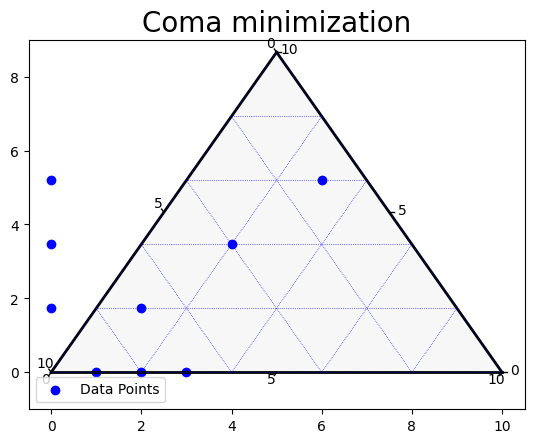

In [8]:
cat = Table.read("/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2023/instrument_alignment_focusing/THROUGHFOCUS/stack_cat.csv")

import ternary
tf = np.loadtxt("/Users/Vincent/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/Safari/ABCmoves.txt",skiprows=2)
scale = 10
figure, tax = ternary.figure(scale=scale)
tax.set_title("Coma minimization", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=2, color="blue")
tax.scatter(tf, marker='o', color='blue', label='Data Points')
tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.show()



In [ ]:

a = Table.read("/Users/Vincent/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/Safari/Detector testing log - 2306016 detector_coma_minimization-3.csv")

a["Sigma"] = 0.0
a["Flux"] = 0.0
a["EE50"] = 0.0
a["EE80"] = 0.0
a["cx"] = 0.0
a["cy"] = 0.0
fig, axes = plt.subplots (6,6,sharex=True,sharey=True,figsize=(18,18))
r=22
for i, line in enumerate(a[:]):
    try:
        print(int(line["position Y"]))
    except Exception as e:
        print(e)
        # a=0
        axes.flatten()[i].axis(False)
        pass
    else:
        x0,y0 = 87.593333, 53.873333
        x0,y0 = 0,0
        x0,y0 = -171, 4
        image = fits.open("/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2023/DOBC_data/230616/coma_minimization/image%06d.fits"%(int(line["Det Imno"])))[0].data
        x, y = float(line["position Y"])+y0, float(line["position X"])+x0
        axes.flatten()[i].imshow(image[int(x)-r:int(x)+r,int(y)-r:int(y)+r])#,interpolation=False)
        # axes.flatten()[i].imshow(image[int(line["position X"])-r:int(line["position X"])+r,int(line["position Y"])-r:int(line["position Y"])+r])#,interpolation=False)
        # # axes.flatten()[i].imshow(image[int(line["Centroid_y"])-r:int(line["Centroid_y"])+r,int(line["Centroid_x"])-r:int(line["Centroid_x"])+r],norm=LogNorm())
        d = analyze_spot(
        image,
        center=[float(line["position X"]),float(line["position Y"])],
        fibersize=0,
        center_type="max",
        SigmaMax=50,
        )
        # a["Sigma"][i] = d["Sigma"]
        # a["Flux"][i] = d["Flux"]
        # a["EE50"][i] = d["EE50"]
        # a["EE80"][i] = d["EE80"]
        # a["cx"][i] = d["Center"][0]
        # a["cy"][i] = d["Center"][0]
        # axes.flatten()[i].plot([7,13,13,7,7],[0,0,20,20,0],"-k")
        # if i<6:
        axes.flatten()[i].set_title( "%i: %i - %i"%(int(line["Det Imno"]) ,float(line["position X"]),float(line["position Y"])))
        # axes.flatten()[i].plot(0,0,".",label=np.round(2.35*a["Sigma"][i]*1.1,1))
        # axes.flatten()[i].legend()
        # axes.flatten()[i].plot([8,12,12,8,8],[0,0,20,20,0],"--k")
fig.tight_layout()
a["Sigma","Flux","EE50","EE80","cx","cy"].to_pandas().to_clipboard()